<a href="https://colab.research.google.com/github/che0223/github_test/blob/master/My_first_data_analysis_for_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [9]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df_train.max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                   80.0
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                              512.3292
dtype: object

In [15]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [17]:
df_train.shape

(891, 12)

In [22]:
for col in df_train.columns:
  msg = 'columns: {:>11}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
  print(msg)

columns: PassengerId	 Percent of NaN value: 0.00%
columns:    Survived	 Percent of NaN value: 0.00%
columns:      Pclass	 Percent of NaN value: 0.00%
columns:        Name	 Percent of NaN value: 0.00%
columns:         Sex	 Percent of NaN value: 0.00%
columns:         Age	 Percent of NaN value: 19.87%
columns:       SibSp	 Percent of NaN value: 0.00%
columns:       Parch	 Percent of NaN value: 0.00%
columns:      Ticket	 Percent of NaN value: 0.00%
columns:        Fare	 Percent of NaN value: 0.00%
columns:       Cabin	 Percent of NaN value: 77.10%
columns:    Embarked	 Percent of NaN value: 0.22%


In [24]:
df_train['Cabin'].isnull().sum()

687

In [26]:
df_train['Cabin'].shape

(891,)

In [27]:
df_train['Cabin'].isnull().sum() / df_train['Cabin'].shape

array([0.77104377])

In [29]:
for col in df_test.columns:
  msg = 'columns: {:>11}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
  print(msg)

columns: PassengerId	 Percent of NaN value: 0.00%
columns:      Pclass	 Percent of NaN value: 0.00%
columns:        Name	 Percent of NaN value: 0.00%
columns:         Sex	 Percent of NaN value: 0.00%
columns:         Age	 Percent of NaN value: 20.57%
columns:       SibSp	 Percent of NaN value: 0.00%
columns:       Parch	 Percent of NaN value: 0.00%
columns:      Ticket	 Percent of NaN value: 0.00%
columns:        Fare	 Percent of NaN value: 0.24%
columns:       Cabin	 Percent of NaN value: 78.23%
columns:    Embarked	 Percent of NaN value: 0.00%


<Axes: >

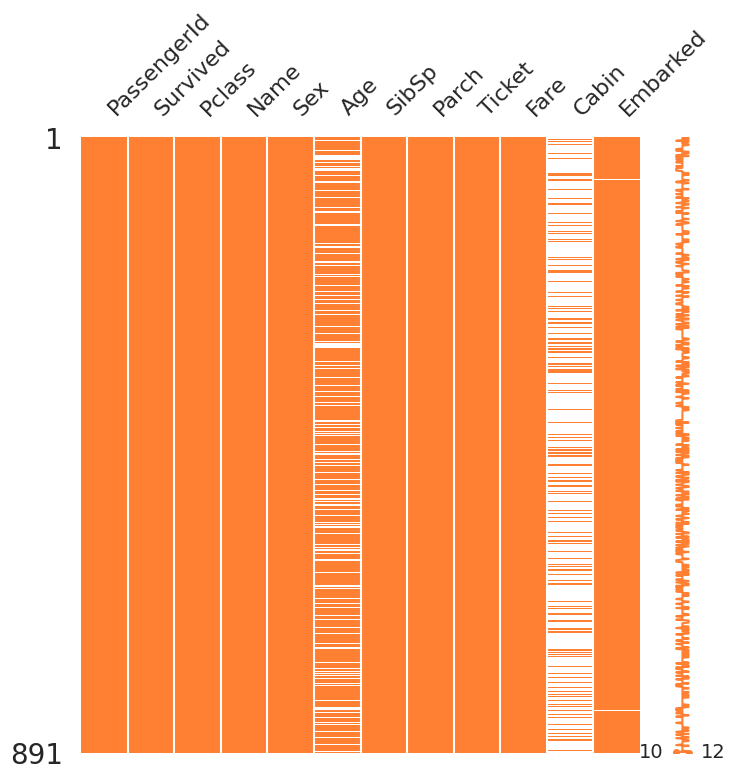

In [34]:
msno.matrix(df=df_train, figsize=(8, 8), color=(1, 0.5, 0.2)) # 데이터의 분포를 보기 쉬움

In [33]:
df_train.iloc[1:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<Axes: >

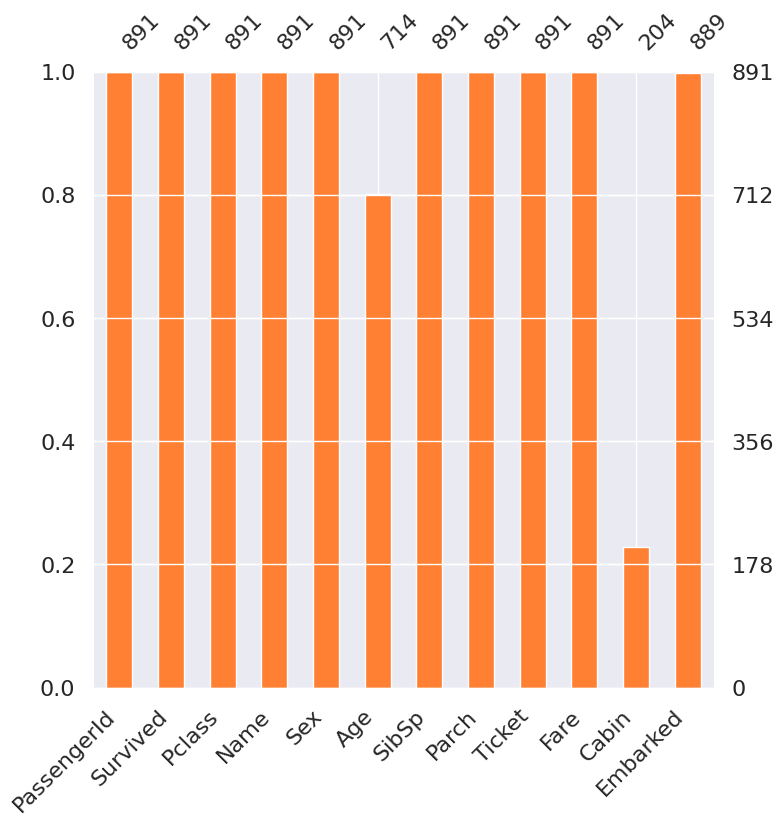

In [36]:
msno.bar(df=df_train, figsize=(8, 8), color=(1, 0.5, 0.2)) # 데이터 퍼센트를 보기 쉬움